* Найдите **среднее арифметическое** для суммы чаевых в датасете **tips**.
Извлеките **1000** выборок с возвращением. Постройте **гистограмму бутстрэпнутых средних**. Сравните с оригинальным выборочным средним.

* Найдите **95%-й доверительный интервал бутстрэпнутых средних**, используя процентильный или *bias-corrected and accelerated метод*.
    
* Найдите **медиану** для суммы чаевых в датасете **tips**.
Извлеките **1000** выборок с возвращенеим. Постройте **гистограмму бутстрэпнутых медиан**. Сравните с оригинальным выборочной медианой.

* **Сравните вариабельность** медиан с вариабельностью средних. Не ограничивайтесь изобразительной деятельностью. Сообщите, что вы заметили.

* Для увлекательных сновидений найдите в WWW истории о сказочных приложениях бутстрэпа. 


In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# доступ к файлу удалось получить предварительно скачав его на ПК
file = '/Users/Administrator/Documents/Finale Files/tips.csv'
df = pd.read_csv(file)

In [3]:
# Cреднее арифметическое для суммы чаевых
mean_df = df['tip'].mean()
f'Среднее арифметическое: {mean_df}'

'Среднее арифметическое: 2.99827868852459'

In [4]:
# Проведение бутстрэппинга
n_samples = 1000
bootstrap_means = np.zeros(n_samples)
rng = np.random.default_rng(500)
for i in range(n_samples):
    bootstrap_sample = rng.choice(df['tip'], size=len(df), replace=True)
    bootstrap_mean = np.mean(bootstrap_sample)
    bootstrap_means[i] = bootstrap_mean
# Оценка среднего и стандартной ошибки
est_mean = np.mean(bootstrap_means)
est_std = np.std(bootstrap_means, ddof=1)
print("Оценка средней суммы чаевых в генеральной совокупности:", round(est_mean, 4))
print("Стандартная ошибка оценки:", round(est_std, 4))

Оценка средней суммы чаевых в генеральной совокупности: 2.9974
Стандартная ошибка оценки: 0.084


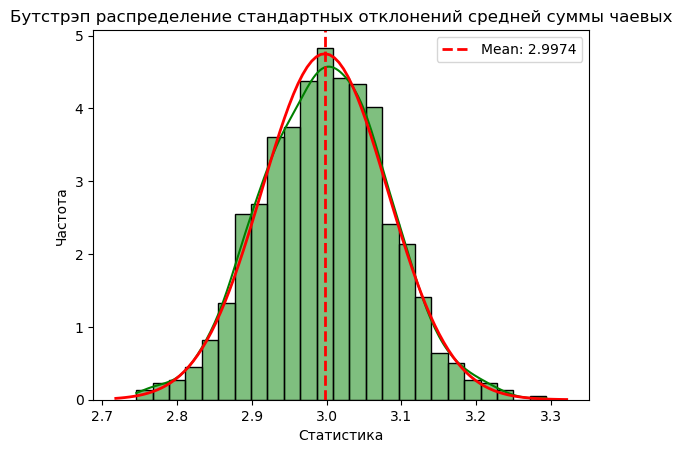

In [5]:
# Построение гистограммы бутстрэпнутых средних 
sns.histplot(bootstrap_means, bins=25, kde=True, stat='density', color='green'
            ).set(title='Бутстрэп распределение стандартных отклонений средней суммы чаевых',
                  xlabel='Статистика',
                  ylabel='Частота')
# Наложение функции плотности вероятности нормального распределения
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, loc=est_mean, scale=est_std)
plt.plot(x, p, linewidth=2, color='red')
# Вертикаль для среднего значения бутстрэпнутых данных
plt.axvline(est_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {est_mean:.4f}')
plt.legend();

Выводы:
1. Гистограмма имеет симметричную форму - распределение средних значений близко к нормальному.
2. Линия средней суммы чаевых в генеральной совокупности как и значение среднего арифметического находится в центре гистограммы - значение является хорошей оценкой для генеральной совокупности.

In [6]:
# Расчёт 95%-й доверительного интервала bias-corrected and accelerated методом
res = stats.bootstrap(data=(df['tip'].values,), statistic=lambda data: np.mean(data), 
                      confidence_level=0.95, n_resamples=1000, random_state=500, method='Bca')
(low, high) = res.confidence_interval
f"95%-й Д.И.: [{low:.3f}, {high:.3f}]"

'95%-й Д.И.: [2.835, 3.175]'

In [7]:
np.median(df.tip)

2.9

In [8]:
# Проведение бутстрэппинга для медианы
n_samples = 1000
bootstrap_medians = np.zeros(n_samples)
rng = np.random.default_rng(500)
for i in range(n_samples):
    bootstrap_sample = rng.choice(df['tip'], size=len(df['tip']), replace=True)
    bootstrap_medians[i] = np.median(bootstrap_sample)
    # Оценка среднего и стандартной ошибки
med_mean = np.mean(bootstrap_medians)
med_std = np.std(bootstrap_medians, ddof=1)
print("Оценка средней медианы в генеральной совокупности:", round(med_mean, 4))
print("Стандартная ошибка оценки:", round(med_std, 4))

Оценка средней медианы в генеральной совокупности: 2.8453
Стандартная ошибка оценки: 0.1643


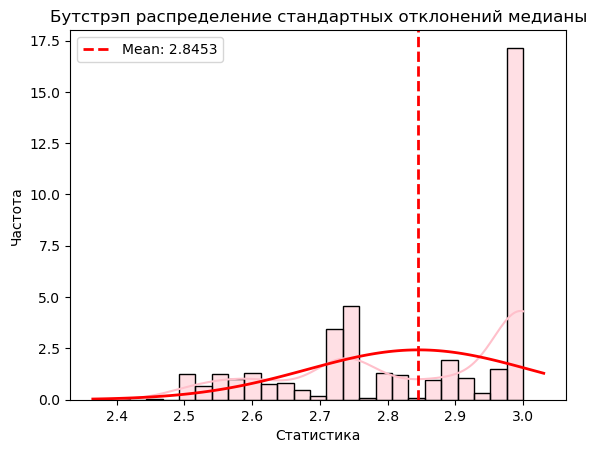

In [9]:
# Построение гистограммы бутстрэпнутых средних медианы
sns.histplot(bootstrap_medians, bins=25, kde=True, stat='density', color='pink'
            ).set(title='Бутстрэп распределение стандартных отклонений медианы',
                  xlabel='Статистика',
                  ylabel='Частота')
# Наложение функции плотности вероятности нормального распределения
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, loc=med_mean, scale=med_std)
plt.plot(x, p, linewidth=2, color='red')
# Вертикаль для среднего значения бутстрэпнутых данных
plt.axvline(med_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {med_mean:.4f}')
plt.legend();

In [10]:
# Расчёт 95%-й доверительного интервала процентильным методом
confidence_interval_med = np.percentile(bootstrap_medians, [2.5, 97.5])
print("95% Д.И:", np.round(confidence_interval_med, 4))

95% Д.И: [2.5 3. ]


Выводы:
1. Гистограмма имеет примерно симметричную форму - стандартные отклонения медианы распределены близко к нормальному распределению.
2. Среднее значение оригинальной медианы отличается от средней медианы в генеральной совокупности на 2%, тем не менее оба значения находится в центре гистограммы.
3. Центр гистограммы находится в районе среднего значения - большинство бутстрэп-выборок дают стандартные отклонения медианы, близкие к этому значению.
4. На диаграмме хвосты короткие, аномалий не видно - крайние значения встречаются редко, медиана редко даёт сильно отклоняющиеся оценки.

In [11]:
# Сравнение отклонений средних и медиан
print(f'Оценка среднего для бутстрэпнутых средних: {est_mean}, стандартное отклонение: {est_std}')
print(f'Оценка среднего для бутстрэпнутых медиан: {med_mean}, стандартное отклонение: {med_std}')

Оценка среднего для бутстрэпнутых средних: 2.997448442622951, стандартное отклонение: 0.08395629821626337
Оценка среднего для бутстрэпнутых медиан: 2.84532, стандартное отклонение: 0.16428614530001467


Выводы:
1. Исходя из значения выбросов данных, которые значительно влияют на среднее на нижеуказанном графике ящика с усами - стандартное отклонение для средних значений оказалось ниже, чем у медианы.
2. Размер выборки бутстрэппинга оказался недостаточно большим, что привело к большему разбросу медиан, чем средних значений.

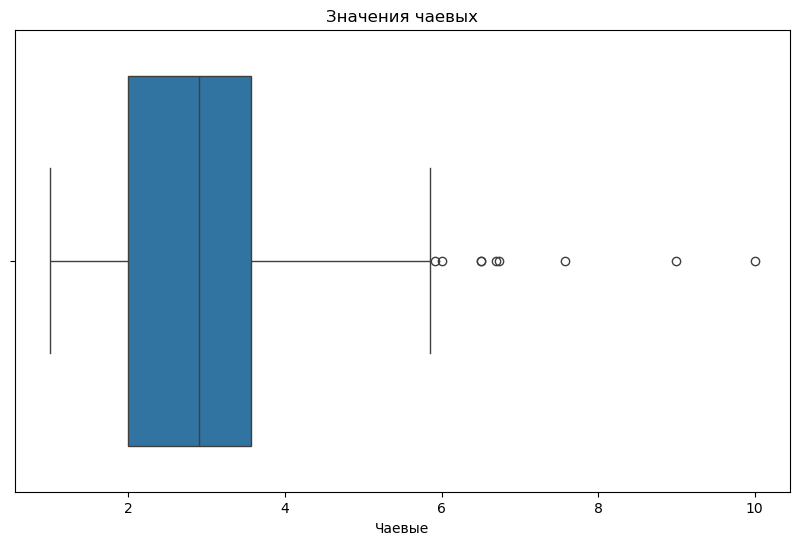

In [12]:
# График ящика с усами
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['tip'])
plt.title('Значения чаевых')
plt.xlabel('Чаевые');